Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

      Nombre de bornes disponibles  Nombres de bornes en station  \
0                               21                            25   
1                               23                            25   
2                                0                             0   
3                               29                            33   
4                               24                            30   
5                               21                            25   
6                               18                            23   
7                               16                            25   
8                               19                            28   
9                               15                            18   
10                              15                            18   
11                              15                            20   
12                              27                            27   
13                              10              

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


              x          y  indispo
1     87.017960  39.672730        1
3     83.667580  39.179586        2
5     90.271566  39.332706        1
9     88.107791  30.954926        1
10    88.414676  34.184541        2
11    89.104123  34.001459        1
17    84.274150  33.502120        1
21    82.223342  42.153283        1
26    89.383910  32.595399        2
28    87.428448  33.297651        1
31    87.181181  30.023898        1
36    84.308532  32.026395        1
38    88.109247  34.082248        1
40    80.956437  36.269087        1
41    85.698641  28.217322        1
44    88.104925  42.499322        1
46    86.524233  35.166699        2
50    83.996691  37.886257        3
53    85.683630  47.802360        4
55    86.860172  35.570103        1
58    84.970400  36.446079        1
64    83.552381  30.259866        1
66    84.704055  41.604537        2
70    89.277772  32.703358        2
71    87.787063  39.590734        3
75    88.179064  40.305994        1
80    87.368240  39.602780  

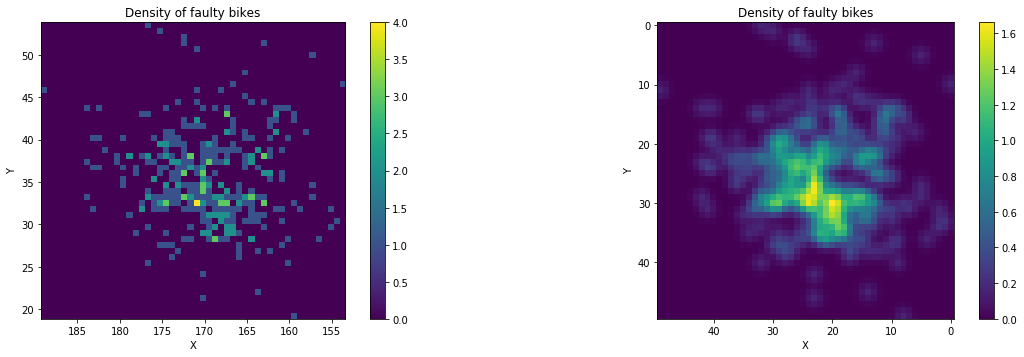

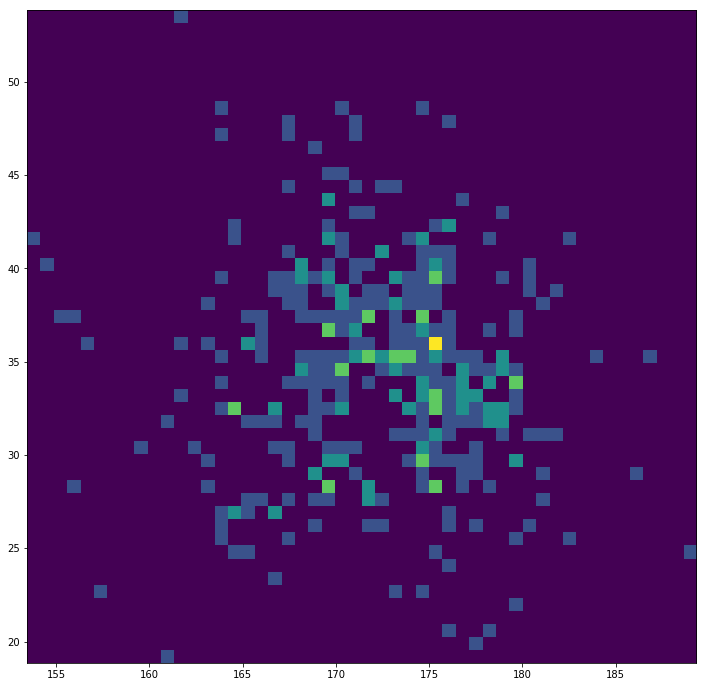

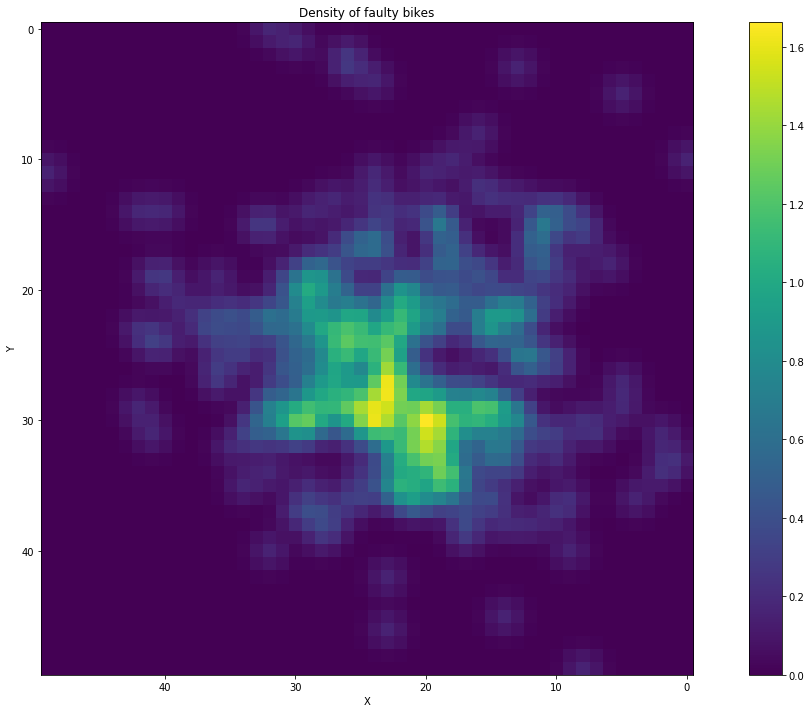

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

data=pd.read_csv("velib-disponibilite-en-temps-reel.csv", delimiter=";")

data_clean=data[["Nombre de bornes disponibles", "Nombres de bornes en station","Nombre vélo électrique","Nombre de vélo mécanique" ,"geo"]]
data_clean["indispo"]=data_clean["Nombres de bornes en station"]-data_clean["Nombre de bornes disponibles"]-data_clean["Nombre vélo électrique"]-data_clean["Nombre de vélo mécanique"]
print (data_clean)
data_clean = data_clean[data_clean['indispo']>0]

data_draw=data_clean[["geo","indispo"]]
#print (data_draw)
# new data frame with split value columns 
new = data_draw["geo"].str.split(", ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data_draw["x"]= new[0] 
  
# making separate last name column from new data frame 
data_draw["y"]= new[1] 

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

data_draw['x'] = 100*(data_draw['x'].astype(float)-48.0)
data_draw['y'] = 100*(data_draw['y'].astype(float)-2.0)
data_draw.loc[data_draw.index.repeat(data_draw.indispo)]

data = data_draw[['x','y','indispo']]


print (data)


# Generate some test data
x = 2*data_draw['x']
y = data_draw['y']

heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
print (heatmap)

from astropy.convolution import convolve
from astropy.convolution.kernels import Gaussian2DKernel

plt.clf()
plt.subplot(2,2,1)
plt.imshow(heatmap, extent=extent, interpolation='none')
plt.colorbar()
plt.title('Density of faulty bikes')
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_xaxis()

plt.subplot(2,2,2)
plt.imshow(convolve(heatmap, Gaussian2DKernel(x_stddev=1,y_stddev=1)), interpolation='none')
plt.colorbar()
plt.title('Density of faulty bikes')
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_xaxis()

plt.show()



plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()


plt.imshow(convolve(heatmap, Gaussian2DKernel(x_stddev=1,y_stddev=1)), interpolation='none')
plt.colorbar()
plt.title('Density of faulty bikes')
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().invert_xaxis()
plt.savefig('heatmap_faulty_bikes.png')

plt.show()



In [17]:
### to do gif from multiple images
import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)

ModuleNotFoundError: No module named 'imageio'